In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn as sk
import sklearn.linear_model
import os

import PlaceCellAnalysis as pc
import utilities as u
import preprocessing as pp
import behavior as b
import BayesianDecoding as bd

os.sys.path.append("C:\\Users\\mplitt\\MightyMorphingPhotonRangers\\CensoredLstsq")
os.sys.path.append("")

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
mice = ['4139190.1','4139190.3','4139212.2','4139219.2','4139219.3','4139224.2','4139224.3','4139224.5']
df = pp.load_session_db()
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

In [3]:
mouse = '4139219.2'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]

sess = df_mouse.iloc[10]
print(sess['data file'])

G:\My Drive\\VR_Data\TwoTower\4139219.2\23_10_2018\TwoTower_Timeout_2.sqlite


In [5]:
VRDat,C, S, A = pp.load_scan_sess(sess)
#C = sp.stats.zscore(C,axis=0)
cmax = np.mean(C,axis=0)
print(cmax.shape)
C= np.divide(C,np.dot(np.ones([C.shape[0],1]),cmax[np.newaxis,:]))


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


(1795,)


In [6]:
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
#S_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(S,VRDat.pos._values,tstart_inds,teleport_inds)
C_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(C,VRDat.pos._values,tstart_inds,teleport_inds,bin_size=10)
#C_trial_mat = np.nanmean(C_trial_mat,axis=1)

C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:256: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:257: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [7]:
np.isnan(C_trial_mat).sum()

254890

In [8]:

C_trial_Ncat = np.reshape(C_trial_mat,[C_trial_mat.shape[0],-1])

In [9]:
np.isnan(C_trial_Ncat).sum()

254890

In [10]:
print(C_trial_Ncat.shape)

(120, 80775)


In [11]:
from cv import masked_pca

In [13]:
U,Vt,train_err = masked_pca(np.copy(C_trial_Ncat),6,nonneg=True)

0 24.580286
1 24.306597
2 24.075266
3 24.071476
4 24.07011
5 24.055658
6 24.034693
7 24.02173
8 24.050215
9 24.38269
10 24.902767
11 25.353949
12 25.802305
13 26.288776
14 26.809587
15 27.361507
16 27.941875
17 28.550396
18 29.187885
19 29.854483
20 30.547186
21 31.262829
22 31.9992
23 32.75449
24 33.528114
25 34.318703
26 35.12455
27 35.944336
28 36.77694
29 37.621365
30 38.4768
31 39.342438
32 40.217545
33 41.101437
34 41.993526
35 42.89328
36 43.800148
37 44.71364
38 45.63335
39 46.558872
40 47.489834
41 48.425884
42 49.366726
43 50.312042
44 51.26158
45 52.215076
46 53.172295
47 54.133022
48 55.097054
49 56.0642


0.0 68329.80936956964


C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


nan nan


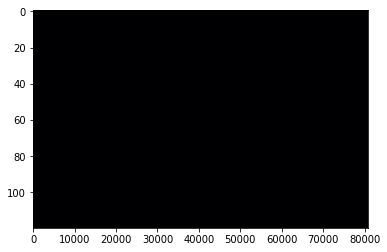

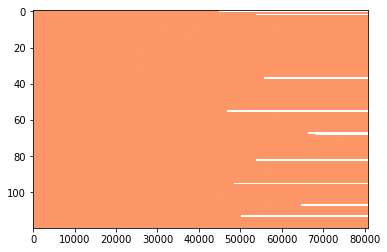

In [14]:
f,ax = plt.subplots()
ax.imshow(np.dot(U,Vt),aspect='auto',cmap='magma')
print(np.dot(U,Vt).min(),np.dot(U,Vt).max())
f,ax = plt.subplots()
ax.imshow(C_trial_Ncat,aspect='auto',cmap='magma')
print(C_trial_Ncat.ravel().min(),C_trial_Ncat.ravel().max())

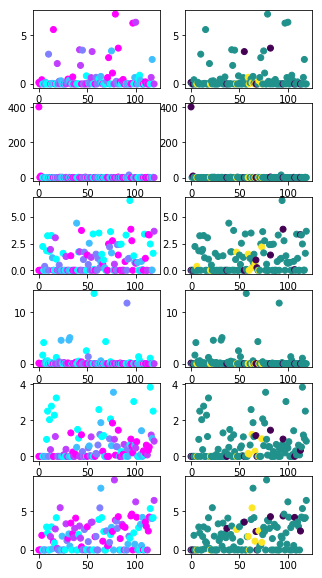

In [15]:
f,ax = plt.subplots(U.shape[1],2,figsize=[5,10])
for factor in range(U.shape[1]):
    ax[factor,0].scatter(np.arange(120),U[:,factor],c=trial_info['morphs'],cmap='cool')
    ax[factor,1].scatter(np.arange(120),U[:,factor],c=trial_info['rewards']+2*trial_info['omissions'],cmap='viridis')
    #ax[factor].set_ylim([0,2])

(120, 45, 1795)
(120,)
[ 0.00000000e+00  3.63797881e-12  7.27595761e-12 -1.45519152e-11
  1.45519152e-11 -1.45519152e-11 -7.27595761e-12  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.45519152e-11  0.00000000e+00
  1.45519152e-11  0.00000000e+00  1.45519152e-11 -1.45519152e-11
  0.00000000e+00 -1.45519152e-11  1.45519152e-11 -1.45519152e-11
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.45519152e-11  0.00000000e+00  1.45519152e-11  2.50111043e-12
  1.45519152e-11  1.45519152e-11  1.45519152e-11  0.00000000e+00
 -1.45519152e-11 -2.91038305e-11  3.63797881e-12 -1.45519152e-11
  1.45519152e-11  7.27595761e-12  1.45519152e-11 -7.27595761e-12
  3.63797881e-12 -2.91038305e-11  1.45519152e-11 -1.45519152e-11
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.45519152e-11  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.27595761e-12 -1.45519152e-11  0.00000000e+00
  1.45519152e-11  1.45519152e-11 -1.45519152e-11  1.45519152e-11
  

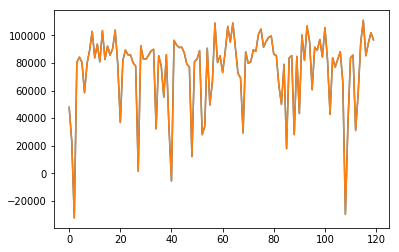

In [16]:
print(C_trial_mat.shape)
trialAct=np.nansum(np.nansum(C_trial_mat,axis=-1),axis=-1)
print(trialAct.shape)
f,ax = plt.subplots()
ax.plot(trialAct)
ax.plot(np.nansum(C_trial_Ncat,axis=-1))
print(trialAct-np.nansum(C_trial_Ncat,axis=-1))

In [18]:
os.sys.path.append("C:\\Users\\mplitt\\nmftools-master\\nmftools")
import ensemble as nmf


In [19]:
print(ranks)

NameError: name 'ranks' is not defined

In [20]:
data = np.copy(C_trial_Ncat)
u,vt,train_err = masked_pca(data,50,nonneg=False)


KeyboardInterrupt: 

In [ ]:
reslist = []
for r in range(50):
    print(r)
    resid = np.memmap(os.path.join("E:\\","resid.dat"),dtype='float32',mode='r+',shape=tuple(data.shape))
    resid = np.dot(u[:, :r], vt[:r,:])-data
    resid = np.sqrt(np.nanmean(resid**2))
    reslist.append(resid)
#     results[r]['svd_rmse'] = resid

In [ ]:
f,ax = plt.subplots()
ax.plot(reslist)

In [ ]:
results = nmf.fit_ensemble_masked(np.copy(C_trial_Ncat),np.arange(1,10),n_replicates=5)

In [18]:
import plots 

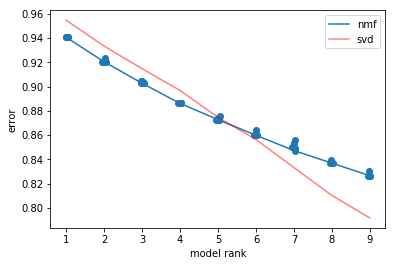

In [56]:
plots.plot_rmse(results)

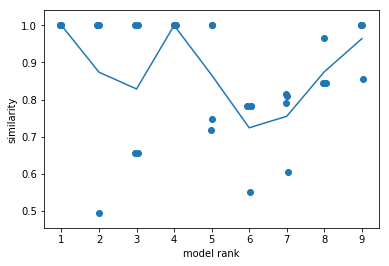

In [57]:
plots.plot_similarity(results)

In [58]:
print(results.keys())
rank = 4

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9])


In [59]:
U,Vt = results[rank]['factors'][0][0],results[rank]['factors'][0][1]

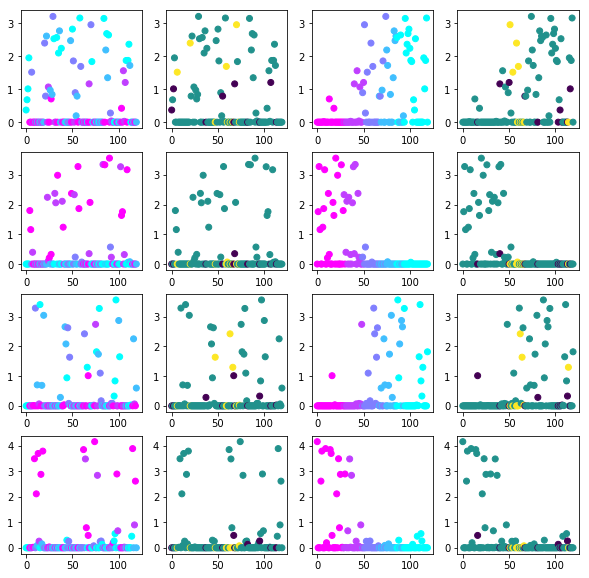

In [60]:
f,ax = plt.subplots(U.shape[1],4,figsize=[10,10])
# ff,aax = plt.subplots(U.shape[1],1,figsize=[5,10])
sort = np.argsort(trial_info['morphs']+trial_info['bckgndJitter']+trial_info['wallJitter']+trial_info['towerJitter'])
for factor in range(U.shape[1]):
    ax[factor,0].scatter(np.arange(120),U[:,factor],c=1-trial_info['morphs'],cmap='cool')
    ax[factor,1].scatter(np.arange(120),U[:,factor],c=trial_info['rewards']+2*trial_info['omissions'],cmap='viridis')
    ax[factor,2].scatter(np.arange(120),U[sort,factor],c=1-trial_info['morphs'][sort],cmap='cool')
    ax[factor,3].scatter(np.arange(120),U[sort,factor],c=trial_info['rewards'][sort]+2*trial_info['omissions'][sort],cmap='viridis')

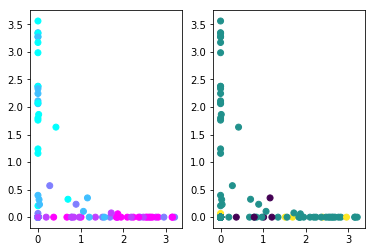

In [61]:
f,ax = plt.subplots(1,2)
ax[0].scatter(U[:,0],U[:,1],c=trial_info['morphs'],cmap='cool')
ax[1].scatter(U[:,0],U[:,1],c=trial_info['rewards']+2*trial_info['omissions'],cmap='viridis')

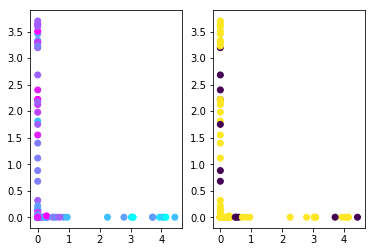

In [48]:
f,ax = plt.subplots(1,2)
ax[0].scatter(U[1:,0],U[1:,1],c=trial_info['morphs'][1:]-trial_info['morphs'][0:-1],cmap='cool')
ax[1].scatter(U[1:,0],U[1:,1],c=trial_info['rewards'][0:-1],cmap='viridis')

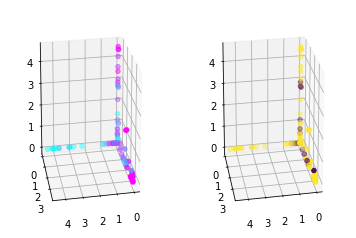

In [49]:
from mpl_toolkits.mplot3d import Axes3D
f= plt.figure()
ax=f.add_subplot(121,projection='3d')
ax.scatter(U[:,0],U[:,1],U[:,3],c=trial_info['morphs'],cmap='cool')
ax.view_init(20,80)

ax=f.add_subplot(122,projection='3d')
ax.scatter(U[:,0],U[:,1],U[:,3],c=trial_info['rewards'],cmap='viridis')
ax.view_init(20,80)

0.0 8.342571206753687


C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


nan nan


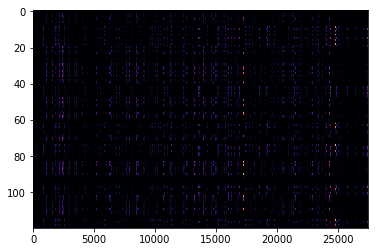

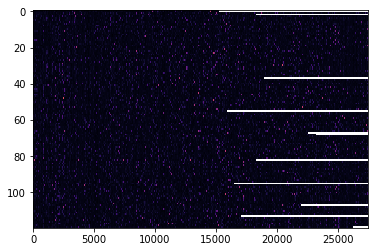

In [62]:
f,ax = plt.subplots()

ax.imshow(np.dot(U,Vt),aspect='auto',cmap='magma')
print(np.dot(U,Vt).min(),np.dot(U,Vt).max())
f,ax = plt.subplots()
ax.imshow(C_trial_Ncat,aspect='auto',cmap='magma')
print(C_trial_Ncat.ravel().min(),C_trial_Ncat.ravel().max())

In [63]:
np.isnan(C_trial_Ncat).sum()

87984

In [64]:
print(U.shape)

(120, 4)


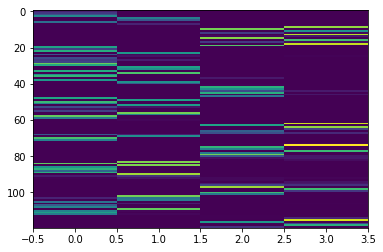

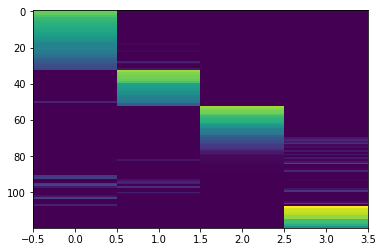

In [65]:
import sklearn.cluster
import sklearn.metrics
import scipy.cluster.hierarchy as sch

D = sk.metrics.pairwise_distances(U)


km = sk.cluster.KMeans(n_clusters=rank).fit(U)

order = []
for col in range(U.shape[1]):

    # arg sort by column value, descending
    colorder = np.flip(np.argsort(U[:,col]),axis=0)
#     print(km.labels_[colorder])
    lbl = km.labels_[colorder[0]]
#     print(lbl)
#     print(U[colorder,col])
#     print(colorder[km.labels_[colorder]==lbl])
#     print(U[colorder[km.labels_[colorder]==lbl],col])
    # find all labels that have the same as first index
    order.extend(colorder[km.labels_[colorder]==lbl])
    

    

# centroids = np.linalg.norm(km.cluster_centers_-km.cluster_centers_[0,:],axis=1)
# # centroids = centroids-centroids[0]
# colOrder=np.argsort(centroids)
# inds = np.argsort(km.labels_)

f,ax = plt.subplots()
ax.imshow(U,aspect='auto')

# order = np.flip(np.argsort(U[:,0]),axis=0)
Uk=U[order,:]
# Ukc = Uk[:,colOrder]
f,ax = plt.subplots()
ax.imshow(Uk,aspect='auto')

In [66]:
Vmat = np.reshape(Vt,[rank,C_trial_mat.shape[1],C_trial_mat.shape[2]])

C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


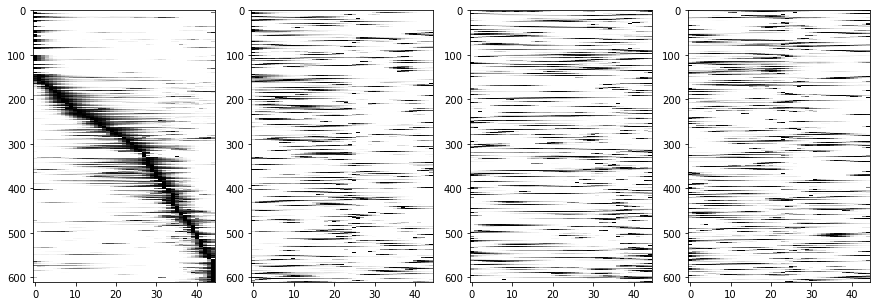

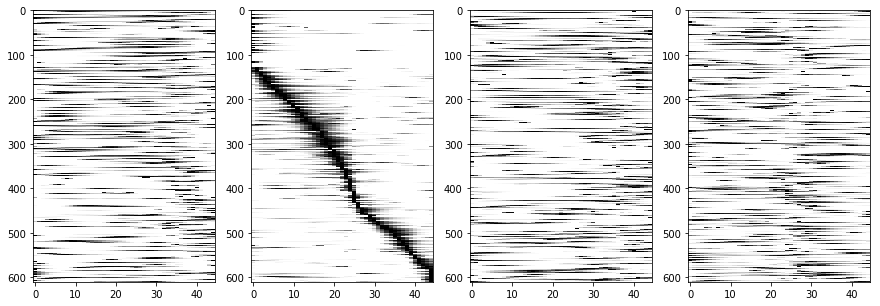

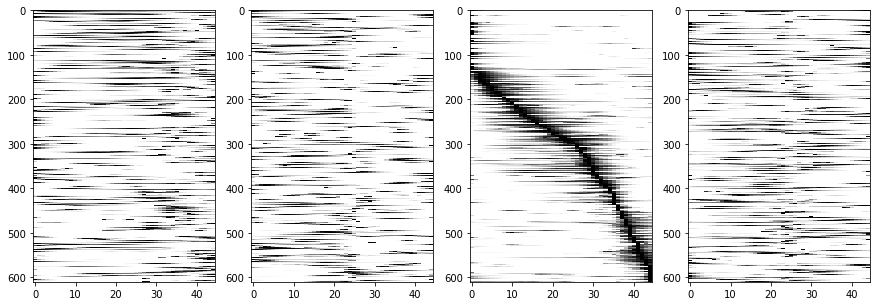

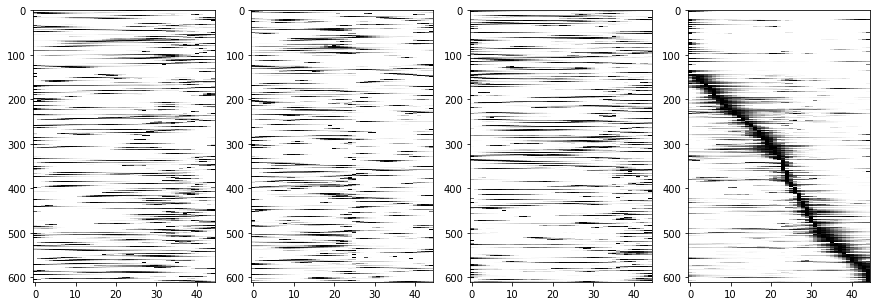

In [67]:
getSort = lambda fr : np.argsort(np.argmax(fr,axis=0))
#factorOrder = [0,1,3,2,4]
for k in range(rank):
    fr_k = np.squeeze(Vmat[k,:,:])
    for col in range(fr_k.shape[1]):
        fr_k[:,col]/=fr_k[:,col].max()
    f,ax = plt.subplots(1,rank,figsize=[15,5])
    sort = getSort(fr_k)
    for j in range(rank):
        fr_j = np.squeeze(Vmat[j,:,:])
        for col in range(fr_j.shape[1]):
            fr_j[:,col]/=fr_j[:,col].max()
            
        ax[j].imshow(fr_j[:,sort].T,cmap='Greys',aspect='auto')
#     fr_ks = fr_k[:,getSort(fr_k)]
#     ax.imshow(fr_ks.T,cmap='Greys',aspect='auto')